<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform **Exploratory Data Analysis** and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data

## Import Libraries and Define Auxiliary Functions


In [ ]:
#import piplite
#await piplite.install(['numpy'])
#await piplite.install(['pandas'])
#await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [1]:
# Pandas for data manipulation and analysis.
import pandas as pd
# NumPy adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
# Seaborn for data visualization based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [47]:
# Use plot_confusion_matrix from sklearn
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    # Use heatmap from seaborn
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'landed']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

## Load the dataframe


Load the data


In [3]:
# Import requests library for HTTP requests to fetch data from URL's
import requests
import pandas as pd
# Import StringIO class from io library
# StringIO is a class that allows you to treat strings as file-like objects
from io import StringIO

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Send an "HTTP GET" request to the URL and store the response in the response variable. 
# This response object contains information about the HTTP response, including the status code and the response content.
response = requests.get(URL1)

if response.status_code == 200:
    # The request was successful
    csv_data = response.text
    # Use StringIO to convert the CSV data into a file-like object
    csv_file = StringIO(csv_data)
    
    # Read the CSV data into a DataFrame
    data_1 = pd.read_csv(csv_file)
    
    # Now you can work with the data as a DataFrame
    print(data_1)
else:
    # Handle the error, e.g., print an error message
    # If the HTTP request fails due to a network error or the URL is invalid
    print(f"Failed to fetch data. Status code: {response.status_code}")

    FlightNumber        Date BoosterVersion   PayloadMass Orbit    LaunchSite  \
0              1  2010-06-04       Falcon 9   6104.959412   LEO  CCAFS SLC 40   
1              2  2012-05-22       Falcon 9    525.000000   LEO  CCAFS SLC 40   
2              3  2013-03-01       Falcon 9    677.000000   ISS  CCAFS SLC 40   
3              4  2013-09-29       Falcon 9    500.000000    PO   VAFB SLC 4E   
4              5  2013-12-03       Falcon 9   3170.000000   GTO  CCAFS SLC 40   
..           ...         ...            ...           ...   ...           ...   
85            86  2020-09-03       Falcon 9  15400.000000  VLEO    KSC LC 39A   
86            87  2020-10-06       Falcon 9  15400.000000  VLEO    KSC LC 39A   
87            88  2020-10-18       Falcon 9  15400.000000  VLEO    KSC LC 39A   
88            89  2020-10-24       Falcon 9  15400.000000  VLEO  CCAFS SLC 40   
89            90  2020-11-05       Falcon 9   3681.000000   MEO  CCAFS SLC 40   

        Outcome  Flights  G

In [46]:
print(type(data_1)) # pandas data frame
print(data_1.shape) # 90 x 18
data_1.head()

<class 'pandas.core.frame.DataFrame'>
(90, 18)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
import requests
import pandas as pd
from io import StringIO

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

response = requests.get(URL2)

if response.status_code == 200:
    # The request was successful
    csv_data = response.text
    # Use StringIO to convert the CSV data into a file-like object
    csv_file = StringIO(csv_data)
    
    # Read the CSV data into a DataFrame
    data_2 = pd.read_csv(csv_file)
    
    # Now you can work with the data as a DataFrame
    print(data_2)
else:
    # Handle the error, e.g., print an error message
    print(f"Failed to fetch data. Status code: {response.status_code}")


    FlightNumber   PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0            1.0   6104.959412      1.0    1.0          0.0          0.0   
1            2.0    525.000000      1.0    1.0          0.0          0.0   
2            3.0    677.000000      1.0    1.0          0.0          0.0   
3            4.0    500.000000      1.0    1.0          0.0          0.0   
4            5.0   3170.000000      1.0    1.0          0.0          0.0   
..           ...           ...      ...    ...          ...          ...   
85          86.0  15400.000000      2.0    5.0          2.0          0.0   
86          87.0  15400.000000      3.0    5.0          2.0          0.0   
87          88.0  15400.000000      6.0    5.0          5.0          0.0   
88          89.0  15400.000000      3.0    5.0          2.0          0.0   
89          90.0   3681.000000      1.0    5.0          0.0          0.0   

    Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0         0.0     

In [6]:
print(type(data_2)) # pandas dataframe
print(data_2.shape) # 90 x 83

data_2.head()

<class 'pandas.core.frame.DataFrame'>
(90, 83)


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [16]:
#data_1.value_counts()

#data_1['BoosterVersion'].value_counts() # 'Falcon 9' 90 times
print(data_1['Orbit'].value_counts()) # 11 Unique Values
print(data_1['LaunchSite'].value_counts()) # 3 launch sites
data_1.head()


GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
GEO       1
SO        1
HEO       1
ES-L1     1
Name: Orbit, dtype: int64
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### <code>NOTE:<code> 
data_2 is the encoded data of all the columns (except 'Class' column) in data_1

In [17]:
# Check some of the unique values of some of the 17 other columns than 'Class' - the output column

print(data_1['BoosterVersion'].unique()) # Only 1 Booster Version
print(data_1['Orbit'].unique()) # 11 Orbits
print(data_1['LaunchSite'].unique()) # 3 Launch Sites
print(data_1['LandingPad'].unique()) # 5 (and 1 NAN) Landing pads

['Falcon 9']
['LEO' 'ISS' 'PO' 'GTO' 'ES-L1' 'SSO' 'HEO' 'MEO' 'VLEO' 'SO' 'GEO']
['CCAFS SLC 40' 'VAFB SLC 4E' 'KSC LC 39A']
[nan '5e9e3032383ecb761634e7cb' '5e9e3032383ecb6bb234e7ca'
 '5e9e3032383ecb267a34e7c7' '5e9e3033383ecbb9e534e7cc'
 '5e9e3032383ecb554034e7c9']


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [21]:
print(data_1['Class'].unique()) # only values of 0 and 1

Y = data_1['Class'].to_numpy()
print(type(Y)) # numpy array

print('Is Y a pandas series:',isinstance(Y,pd.Series)) # FALSE, its a numpy array
print(Y)

# IF you want to keep it a pd series, just take it out of the dataframe
Y_series = data_1['Class']
print('Is Y-series a pandas series:', isinstance(Y_series,pd.Series)) # True

[0 1]
<class 'numpy.ndarray'>
Is Y a pandas series: False
[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Is Y-series a pandas series: True


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.

In [18]:
# using the StandardScaler class from the preprocessing module of a Python library like scikit-learn
# Standardizing/Scaling involves transforming the data so that it has a mean of 0 and a standard deviation of 1
transform = preprocessing.StandardScaler()
X = preprocessing.StandardScaler().fit(data_2).transform(data_2.astype(float))

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [22]:
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [54]:
X_train.shape # 72 x 83
X_test.shape # 18 x 83, so 18 points for 83 features 
Y_train.shape # 72 train points
Y_test.shape # 18 test points

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [26]:
# Define a parameter grid (dictionary) for hyperparameters and their values, that
# we will use in tuning the logistic regression model to search over

parameters ={# 'C' is the inverse of the regularization strength.
             # It controls the amount of regularization applied to the logistic regression model by searching over three values: 0.01, 0.1, and 1.
             "C":[0.01,0.1,1],
             # Specify a type of regularization penalty, 
             # here we're using penalty called ridge regularization 'l2'
             'penalty':['l2'],
             # Use 'solver' algorithm for optimization, here we use 'lbfgs'
             # 'lbfgs' is 'Limited-memory Broyden-Fletcher-Goldfarb-Shanno," which is a popular optimization algorithm 
             'solver':['lbfgs']}# l1 lasso l2 ridge

# Create Logistic Regression Classifier
lr=LogisticRegression()

In [34]:
# Gridsearchcv used for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique
# Allows us to test parameters of classification algorithms and find the best one
# used to perform hyperparameter tuning by exhaustively searching over a specified parameter grid.
from sklearn.model_selection import GridSearchCV
# Create a gridsearchcv object for logistic regression classifier logreg_cv
# perform 10 fold cross validation
# This means that the dataset will be split into 10 parts, and the model will be trained and evaluated 10 times,
logreg_cv = GridSearchCV(lr, parameters, cv = 10)

# Fit the data
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [36]:
# Get the parameters that gave the best results on the hold out data.
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the train data using the method <code>score</code>:

In [45]:
# Get the best estimator (model) with the best hyperparameters
best_logreg = logreg_cv.best_estimator_

# Use the best model to predict on the train data
train_score = best_logreg.score(X_train, Y_train)

print("Accuracy on Train Set:", train_score) # 0.7083, which means the model correctly classified 70.83 % of the train data points

Accuracy on Train Set: 0.7083333333333334


Lets look at the confusion matrix:


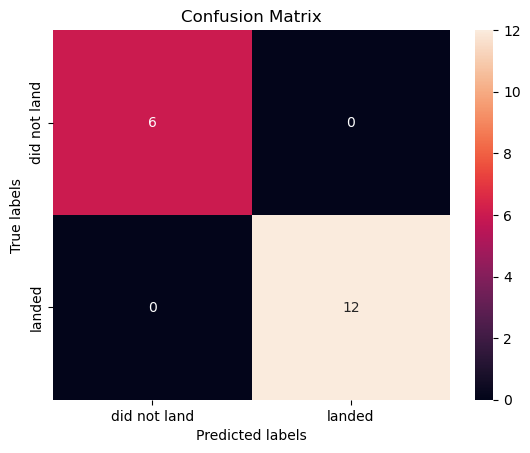

In [48]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat) # remember, there are 18 points for Y_test
# From the confursion matrix, we see 12 are true positives and 6 are true negatives

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [55]:
# All what's inside this parameters dictionary is hyperparameters. So, Kernel, C, and gamma are all hyperparameters
parameters = {# try different kernel function used in the SVM
              'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              # regularization parameter
              # controls the trade-off between maximizing the margin (large C) and minimizing the classification error (small C)
              # creates values evenly spaced on a logarithmic scale from 0.001 to 1000.
              'C': np.logspace(-3, 3, 5),
              # 'gamma' is a hyperparameter specific to certain kernel functions like 'rbf', 'poly', and 'sigmoid'
              'gamma':np.logspace(-3, 3, 5)}

# Support Vector Machine classification algorithm
from sklearn.svm import SVC
svm = SVC()

In [60]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [61]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [76]:
# Get the best estimator (model) with the best hyperparameters
best_svm_cv = svm_cv.best_estimator_

# Use the best model to predict on the train data
train_score = best_svm_cv.score(X_train, Y_train)
test_score = best_svm_cv.score(X_test, Y_test)
print("Accuracy on Train Set:", train_score) # 0.88, which means the model correctly classified 88 % of the train data points
print("Accuracy on Test Set:", test_score) # 0.83, which means the model correctly classified 83 % of the train data points

Accuracy on Train Set: 0.8888888888888888
Accuracy on Test Set: 0.8333333333333334


We can plot the confusion matrix


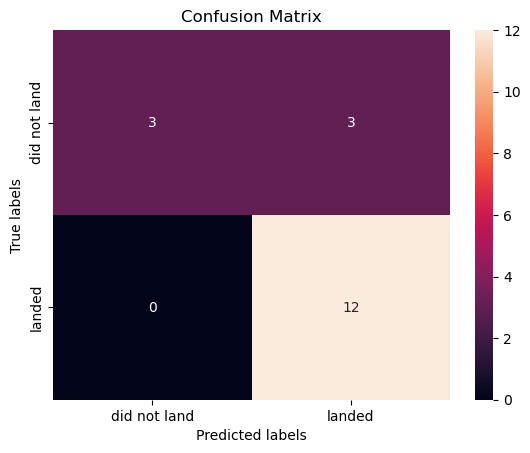

In [63]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [65]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [66]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [67]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8892857142857145


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [68]:
# Get the best estimator (model) with the best hyperparameters
best_tree_cv = tree_cv.best_estimator_

# Use the best model to predict on the train data
train_score = best_tree_cv.score(X_train, Y_train)
test_score = best_tree_cv.score(X_test, Y_test)
print("Accuracy on Train Set:", train_score) # 0.83, which means the model correctly classified 83 % of the train data points
print("Accuracy on Test Set:", test_score) # 0.94, which means the model correctly classified 93 % of the train data points

Accuracy on Train Set: 0.8333333333333334
Accuracy on Test Set: 0.9444444444444444


We can plot the confusion matrix


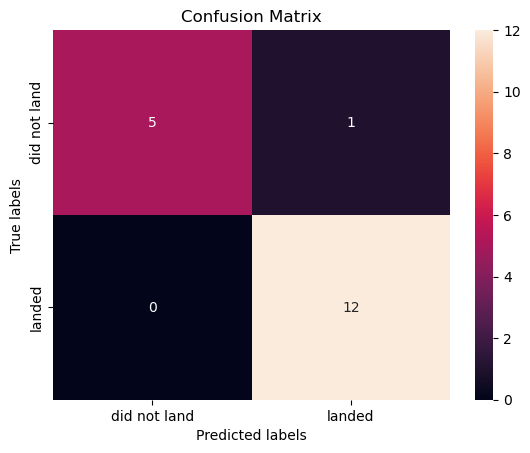

In [69]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [70]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [71]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train,Y_train)

c:\Users\Jad Saade\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Jad Saade\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [72]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [73]:
# Get the best estimator (model) with the best hyperparameters
best_knn_cv = knn_cv.best_estimator_

# Use the best model to predict on the train data
train_score = best_knn_cv.score(X_train, Y_train)
test_score = best_knn_cv.score(X_test, Y_test)
print("Accuracy on Train Set:", train_score) # 0.861, which means the model correctly classified 86.1 % of the train data points
print("Accuracy on Test Set:", test_score) # 0.83, which means the model correctly classified 83 % of the train data points

Accuracy on Train Set: 0.8611111111111112
Accuracy on Test Set: 0.8333333333333334


c:\Users\Jad Saade\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Jad Saade\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

We can plot the confusion matrix


c:\Users\Jad Saade\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


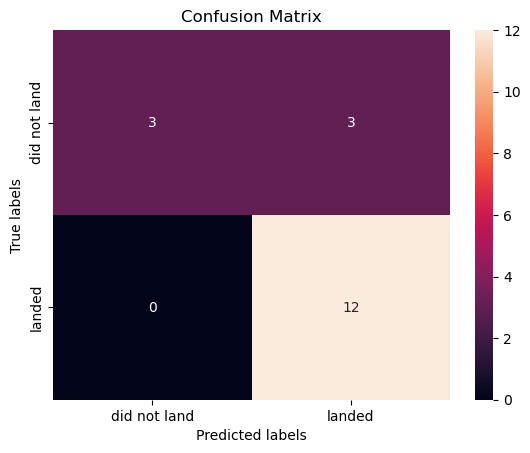

In [74]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [75]:
# logistic regression is the best